In [2]:
import cv2 as cv

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

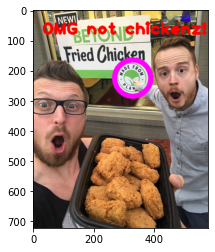

In [51]:
image = cv.imread("../img/soyjaks.jpg", cv.IMREAD_COLOR)
image2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv.putText(image2, 'OMG not chickenz!', (30,80), cv.FONT_HERSHEY_PLAIN, 3.5, (255,0,0), 8, cv.LINE_AA)
cv.circle(image2, (330,225), 60, (255,0,255), 15)
plt.imshow(image2)

In [6]:
def overlay_transparent(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background


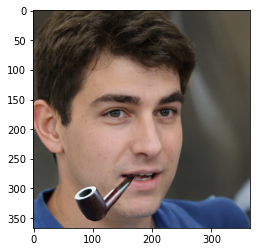

In [29]:
pipe = cv.imread("../img/pipe.png", cv.IMREAD_UNCHANGED)
pipe = cv.flip(pipe, 1)
pipe = cv.resize(pipe, None, fx=0.55, fy=0.55, interpolation=cv.INTER_CUBIC)

man = cv.imread("../img/man-without-pipe.png", cv.IMREAD_UNCHANGED)

final = overlay_transparent(man, pipe, 70, 280)

plt.imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB))